<a href="https://colab.research.google.com/github/ShrijaVarma/cartoon-effect-on-images/blob/main/cartoon_effect_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

LOAD IMAGE

In [28]:
def read_file(filename):
    img = cv2.imread(filename)
    if img is None:
        print("Image not loaded. Check filename or file format.")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

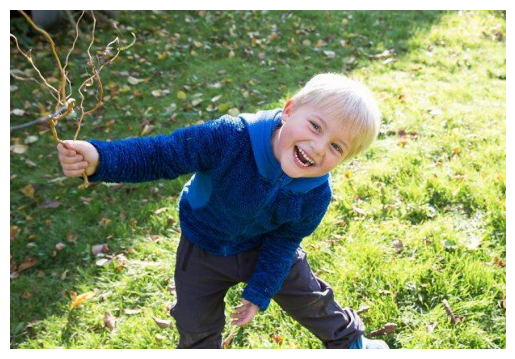

Image shape: (420, 614, 3)


In [29]:
filename = "images.jpg"
img = read_file(filename)

if img is not None:
    print("Image shape:", img.shape)



Create edge Mask


In [32]:
def edge_mask(img, line_size, blue_value):
    """
    Input: input image
    Output: Edges of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, line_size, blue_value )
    return edges



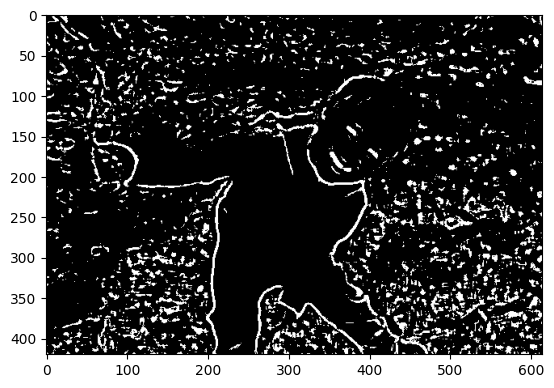

In [36]:
line_size, blur_value = 7,7
edges = edge_mask(img , line_size, blur_value)
plt.imshow(edges, cmap = "binary")
plt.show()